In [1]:
# TerraBlue Xt submission from B.V.S.Akhil
# Phone number: 9956438595
# Mail id: saiakhil.venkata@gmail.com
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/into-the-future/test.csv
/kaggle/input/into-the-future/train.csv


In [2]:
# Importing the important libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# Importing CSV file 
df = pd.read_csv('../input/into-the-future/train.csv') # df = Data Frame
df.head()

,id,time,feature_1,feature_2
0,0,2019-03-19 00:00:00,735.740043,54479.540513
1,1,2019-03-19 00:00:10,734.102947,47888.033714
2,2,2019-03-19 00:00:20,730.060336,47700.882325
3,3,2019-03-19 00:00:30,725.609742,47790.094648
4,4,2019-03-19 00:00:40,724.328480,47808.402381


In [4]:
# Understanding what type of data is present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         564 non-null    int64  
 1   time       564 non-null    object 
 2   feature_1  564 non-null    float64
 3   feature_2  564 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.8+ KB


In [5]:
# Converting date time column as index
dateparse = (lambda time: pd.datetime.strptime(time, '%Y-%m-%d %H:%M:%S'))
df=pd.read_csv('../input/into-the-future/train.csv',parse_dates=['time'], index_col='time', date_parser=dateparse)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,id,feature_1,feature_2
time,,,
2019-03-19 00:00:00,0,735.740043,54479.540513
2019-03-19 00:00:10,1,734.102947,47888.033714
2019-03-19 00:00:20,2,730.060336,47700.882325
2019-03-19 00:00:30,3,725.609742,47790.094648
2019-03-19 00:00:40,4,724.328480,47808.402381


In [6]:
#finding missing values in dataset
df.isnull().sum()

id           0
feature_1    0
feature_2    0
dtype: int64

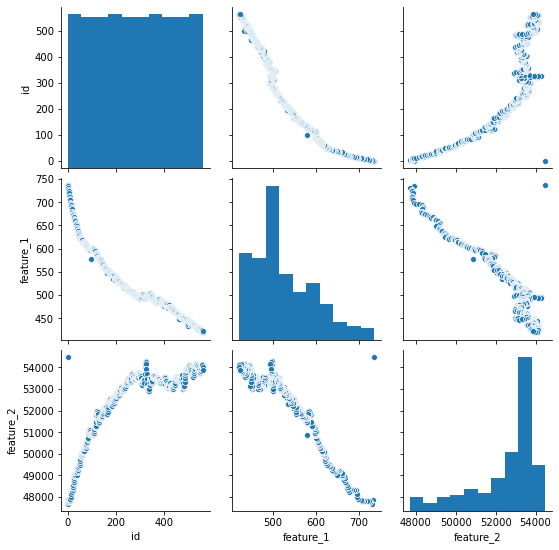

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
#We can see that the feature of first value of df is odd
#Lets drop the first value 
df = df.iloc[1:]

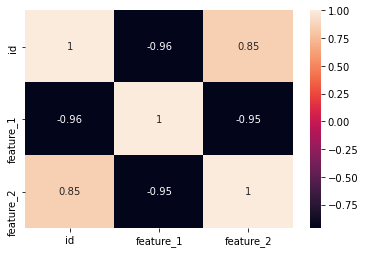

In [9]:
#Selecting features for the model
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [10]:
# selecting the values of x and y
X = df[['feature_1']]
y = df[['feature_2']]

In [11]:
#splitting into test and train for model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
# creting linear regression model
model = LinearRegression()

In [13]:
# training the model on X and y 
model.fit(x_train, y_train)

LinearRegression()

In [14]:
#Using Linear regression model to predict feature 2 in test.csv
predictions = model.predict(x_test)

In [15]:
# Rmse value
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
rmse

475.1634814350945

In [16]:
#R square value
r2=metrics.r2_score(y_test,predictions)
r2

0.9198580030895954

In [17]:
#Lets also try Decision Tree Regressor
model_dt = DecisionTreeRegressor()

In [18]:
#Fitting x&y in decision tree model
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#Using model to predict feature_2 
predictions_dt = model_dt.predict(x_test)

In [20]:
# Rmse value
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions_dt))
rmse

186.5583300357287

In [21]:
#R square value
r2=metrics.r2_score(y_test,predictions_dt)
r2

0.9876461211129524

In [22]:
# We can see that RMSE and R square value for decision tree is higer than  that of linear regression
# Therefore we will use Decision Tree model

In [23]:
# importing test csv file 
df_test = pd.read_csv('../input/into-the-future/test.csv')
df_test.head()

,id,time,feature_1
0,564,2019-03-19 01:34:00,423.064004
1,565,2019-03-19 01:34:10,423.342749
2,566,2019-03-19 01:34:20,423.181186
3,567,2019-03-19 01:34:30,421.275243
4,568,2019-03-19 01:34:40,422.208444


In [24]:
# Understanding what type of data is present in dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         375 non-null    int64  
 1   time       375 non-null    object 
 2   feature_1  375 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.9+ KB


In [25]:
# converting time column in test data to timedate 
df_test['time'] = pd.to_datetime(df_test['time'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         375 non-null    int64         
 1   time       375 non-null    datetime64[ns]
 2   feature_1  375 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.9 KB


In [26]:
#finding missing values in dataset
df_test.isnull().sum()

id           0
time         0
feature_1    0
dtype: int64

In [27]:
#Selecting x from test data
X_test = df_test[['feature_1']]

In [28]:
# Using the model to predict values of feature_2
y_pred = model_dt.predict(X_test)

In [29]:
# converting 2D array to 1D
y_pred = y_pred.flatten()

In [30]:
# creating dataframe using predicted values
final_solution = pd.DataFrame({'id' : df_test['id'], 'feature_2' : y_pred})
final_solution.head()

,id,feature_2
0,564,53829.948214
1,565,53829.948214
2,566,53829.948214
3,567,53994.714950
4,568,53994.714950


In [31]:
# submitting the solution to kaggle output
final_solution.to_csv("/kaggle/working/solution.csv", index=False)